<a href="https://colab.research.google.com/github/macorony/NeuralNetwork/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Basic

In [ ]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [ ]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)

r2 = torch.rand(2,2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [ ]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3) +2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([[4., 4., 4.],
        [4., 4., 4.]])
torch.Size([2, 3])


In [ ]:
r = torch.rand(2,2) - 0.5 * 2
print("A random matrix, r: {}".format(r))
print("\nAbsolute value of r: {}".format(torch.abs(r)))
print("\nInverse sine of r: {}".format(torch.abs(r)))
print("\nDetermined of r: {}".format(torch.det(r)))
print("\nSingular Value decomposition of r: {}".format(torch.svd(r)))
print("\nAverage and standard deviation of r: {}".format(torch.std_mean(r)))
print("\nMaximum value of r: {}".format(torch.max(r)))

A random matrix, r: tensor([[-0.5784, -0.9309],
        [-0.7668, -0.5953]])

Absolute value of r: tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Inverse sine of r: tensor([[0.5784, 0.9309],
        [0.7668, 0.5953]])

Determined of r: -0.36948588490486145

Singular Value decomposition of r: torch.return_types.svd(
U=tensor([[-0.7512, -0.6601],
        [-0.6601,  0.7512]]),
S=tensor([1.4415, 0.2563]),
V=tensor([[ 0.6525, -0.7578],
        [ 0.7578,  0.6525]]))

Average and standard deviation of r: (tensor(0.1656), tensor(-0.7179))

Maximum value of r: -0.5783984065055847


# Autograd

In [ ]:
x = torch.randn(1,10)
prev_h =torch.randn(1,20)
W_h = torch.randn(20,20)
W_x = torch.randn(20,10)

In [ ]:
i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()

In [ ]:
loss = next_h.sum()

# A pytorch model

In [ ]:
# import module
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np

In [ ]:
# datasets
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='\data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

100%|██████████| 170498071/170498071 [00:08<00:00, 20392397.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


100%|██████████| 170498071/170498071 [00:06<00:00, 27473327.47it/s]


Extracting \data/cifar-10-python.tar.gz to \data


In [ ]:
# Visualization
images, labels = next(iter(trainloader))
grid = torchvision.utils.make_grid(images)

  car  bird   car horse


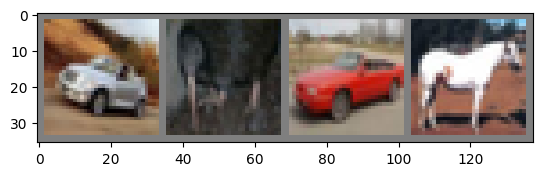

In [ ]:
plt.imshow((grid /2 + 0.5).permute(1,2,0))
print(' '.join('%5s' %  classes[labels[j]] for j in range(4)))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # kernel
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 =nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.194
[1,  4000] loss: 1.839
[1,  6000] loss: 1.676
[1,  8000] loss: 1.591
[1, 10000] loss: 1.511
[1, 12000] loss: 1.455
[2,  2000] loss: 1.391
[2,  4000] loss: 1.352
[2,  6000] loss: 1.340
[2,  8000] loss: 1.311
[2, 10000] loss: 1.273
[2, 12000] loss: 1.260
Finished Training


In [ ]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input)

In [ ]:
output

tensor([[ 0.5816,  0.6268, -0.6016,  ..., -0.4007,  0.4633,  0.1672],
        [-0.6382,  0.5278, -1.4308,  ..., -0.5047, -0.0698,  0.0934],
        [-0.0045, -0.4488, -0.3339,  ..., -0.6418, -0.6971, -0.3431],
        ...,
        [-0.3212, -1.0729, -0.6405,  ...,  0.0686, -0.0320, -1.3854],
        [-0.1396, -0.2422,  0.4459,  ...,  0.2898,  0.0753, -0.2173],
        [-0.2004,  0.0419,  0.3773,  ..., -0.0946,  0.3696,  0.4180]],
       grad_fn=<AddmmBackward0>)

In [ ]:
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16,20)
output = m(input)

In [ ]:
output.shape

torch.Size([20, 7, 9])

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2
import torch
import torchvision
import torchvision.transforms as transforms # used to transform or augment data for training or inference of different tasks

In [ ]:
class Net1(nn.Module):
  def __init__(self):
    super(Net1, self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, input):
    c1 = F.relu(self.conv1(input))
    s2 = F.max_pool2d(c1, (2,2))
    c3 = F.relu(self.conv2(s2))
    s4 = F.max_pool2d(c3, 2)
    s4 = torch.flatten(s4, 1)
    f5 = F.relu(self.fc1(s4))
    f6 = F.relu(self.fc2(f5))
    output = self.fc3(f6)
    return output


In [ ]:
class Net2(nn.Module):
  def __init__(self):
    super(Net2, self).__init__()
    self.hidden1 = nn.Linear(8,12)
    self.act1 = nn.ReLU()
    self.hidden2 = nn.Linear(12, 8)
    self.act2 = nn.ReLU()
    self.output = nn.Linear(8, 2)
    self.act3 = nn.Sigmoid()
  def forward(self, input):
    a1 = self.act1(self.hidden1(input))
    a2 = self.act2(self.hidden2(a1))
    output = self.act3(self.output(a2))
    return output

In [ ]:
net2 = Net2()

In [ ]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(net2.parameters(), lr = 0.001)

In [ ]:
net2(input)

tensor([0.4755, 0.5201], grad_fn=<SigmoidBackward0>)

In [ ]:
net2 = Net2()
# print(net2)
# print(list(net2.parameters()))

# About pooling
1. The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarizing the features lying within the region by the filter.
2. A CNN model architecture is to have a number of convolution and pooling layers stacked one after the other
3. Pooling layer are used to reduce the dimensions of the feature maps. Thus, it reduce the numbers of parameters to learn and the amount of computation in the network.
4. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operation are performed on summarised features instead of precisely positioned features generated by the convolution layer.

## Types of pooling layer
1. Max pooling, a pooling operation to select the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous map.
2. Average pooling computes the average of the elements present in the region of feature map covered by the filter.
3. Global pooling ?



In [ ]:
# Max pooling
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D, AveragePooling2D

image = np.array([
                  [2, 3, 4, 5],
                  [9, 4, 6, 1],
                  [8, 5, 2, 4],
                  [3, 1, 2, 6]
                  ])
image = image.reshape(1, 4, 4, 1)

model_max = Sequential([MaxPooling2D(pool_size=2, strides=2)])

model_average = Sequential([AveragePooling2D(pool_size=2, strides=2)])

output_max = model_max.predict(image)

output_average = model_average.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [ ]:
print("The max-pooling output is {}".format(np.squeeze(output_average)))
print("\nThe average-pooling output is {}".format(np.squeeze(output_average)))


The max-pooling output is [[4.5  4.  ]
 [4.25 3.5 ]]

The average-pooling output is [[4.5  4.  ]
 [4.25 3.5 ]]


# torch.nn.Module
`torch.nn.Module` is the fundatmental class for all neural network in PyTorch, self-defined models should subclass this class

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 5)
    self.conv2 = nn.Conv2d(20, 20, 5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    return F.relu(self.conv2(x))

# Example code to Understand `nn.Module`

In [15]:
class Module:
  def __init__(self):
    self._parameters = {}
    self._buffers = {}
    self._modules = {}
    self.training = True

  def register_parameter(self, name, param):
    if param is None:
      self._parameters[name] = None
    else:
      if not isinstance(param, torch.nn.Parameter):
        param = torch.nn.Parameter(param)
      self._parameters[name] = param

  def register_buffer(self, name, tensor):
    if tensor is not None and not isinstance(tensor, torch.Tensor):
      raise TypeError("buffer must be a Tensor or None")
    self._buffers[name] = tensor

  def add_module(self,name, module):
    '''Add a child module to the current module'''
    if module is not None and not isinstance(module, Module):
      raise TypeError("module must be a Module subclass or None")
    self._modules[name] = module

  def __setattr__(self, name, value):
    '''Special handling for parameters/buffers/modules assignment.'''
    if isinstance(value, torch.nn.Parameter):
      self.register_parameter(name, value)
    elif isinstance(value, torch.Tensor):
      self.register_buffer(name, value)
    elif isinstance(value, Module):
      self.add_module(name, value)
    else:
      object.__setattr__(self, name, value)

  def parameters(self, recurse=True):
    for name, param in self.named_parameters(recurse=recurse):
      yield param

  def named_parameters(self, prefix='', recurse=True):
    for name, param in self,_parameters.items():
      if param is not None:
        yield prefix + name, param
    if recurse:
      for module_name, module in self._modules.items():
        if module is not None:
          submodule_prefix = prefix + module_name + '.'
          for name, param in module.named_parameters(submodule_prefix, recurse):
            yield name, param

  def train(self, mode=True):
    self.training = mode
    for module in self._moduels.values():
      if module is not None:
        module.train(mode)
  def eval(self):
    return self.train(False)

  def to(self, device):
    for param in self.parameters():
      param.data = param.data.to(device)
      if param._grad is not None:
        param._grad.data = param._grad.data.to(device)

    for buf in self._buffers.value():
      if buf is not None:
        self._buffers[name] = buf.to(device)

  def state_dict(self):
      """Returns a dictionary containing module state."""
      state = {}
      # Save parameters
      for name, param in self._parameters.items():
          if param is not None:
              state[name] = param.data
      # Save buffers
      for name, buf in self._buffers.items():
          if buf is not None:
              state[name] = buf
      # Save child modules
      for name, module in self._modules.items():
          if module is not None:
              state[name] = module.state_dict()
      return state

  def load_state_dict(self, state_dict):
      """Load module state from state_dict."""
      for name, param in state_dict.items():
          if name in self._parameters:
              self._parameters[name].data.copy_(param)
          elif name in self._buffers:
              self._buffers[name].copy_(param)
          elif name in self._modules:
              self._modules[name].load_state_dict(param)

  def forward(self, *args, **kwargs):
      """Should be overridden by subclasses."""
      raise NotImplementedError

  def __call__(self, *args, **kwargs):
      """Wrapper around forward() with additional functionality."""
      return self.forward(*args, **kwargs)

1. The `register_buffer` method in `torch.nn.Module` is used to register **non-trainable tensors** associated with the module. These buffers are useful for storing and managing additional state information that is not part of the module's trainable parameters.